In [26]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Explorative Data Analysis

In [27]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',500)
sns.set(style="darkgrid")

In [28]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.head()

,date,Germany,India,US,China,Spain,Italy
0,2020-01-22,0,0,1,548,0,0
1,2020-01-23,0,0,1,643,0,0
2,2020-01-24,0,0,2,920,0,0
3,2020-01-25,0,0,2,1406,0,0
4,2020-01-26,0,0,5,2075,0,0


<Figure size 1152x648 with 0 Axes>

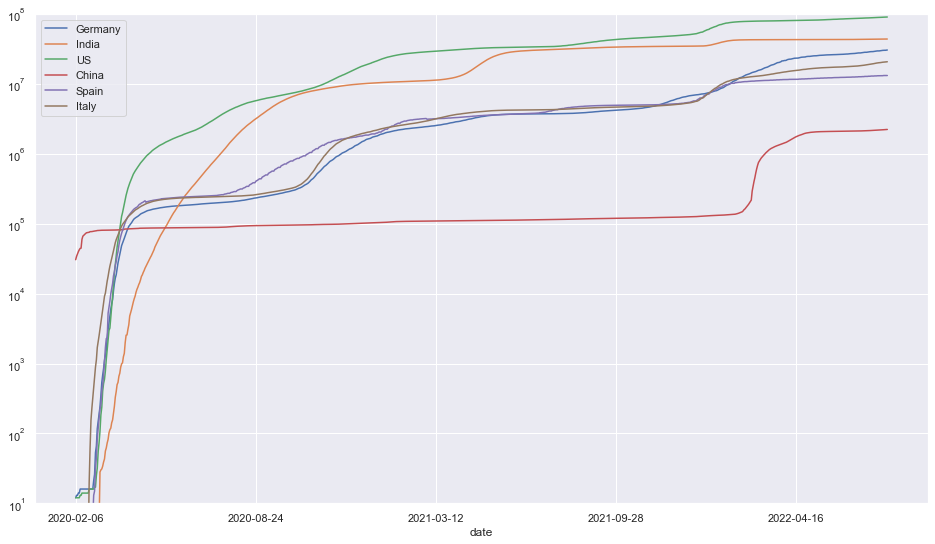

In [29]:
plt.figure();
ax = df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10,100000000)
ax.set_yscale('log')
ax.grid('show')

# Plot.ly

In [5]:
#pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [30]:
import plotly
import plotly.graph_objects as go
plotly.__version__

'5.8.0'

In [31]:
fig = go.Figure()

In [32]:
# to plot individual trace
country_list = ['Germany','India','US','China']
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode = 'markers+lines',
                                opacity = 0.9,
                                line_width = 2,
                                marker_size = 4,
                                name = each))

# defines overall layout
fig.update_layout(width = 1920,
                  height = 1080,
                  xaxis_title='Time',
                 yaxis_title="Confirmed infected people (Source: John Hopkins, log-scale)")

fig.update_yaxes(type="log", range = [1.1,9])

fig.update_layout(xaxis_rangeslider_visible=True)


In [33]:
import dash
from dash import dcc
from dash import html


app = dash.Dash()
app.layout = html.Div([
    #dcc.Graph(figure = fig)
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id = 'Country_Drop_Down',
        options = [
            {'label':'Germany', 'value':'Germany'},
            {'label':'India', 'value':'India'},
            {'label':'US', 'value':'US'},
            {'label':'China', 'value':'China'}
        ],
        value= ['Germany','India'],
        multi = True
    ),
    dcc.Graph(figure = fig, id = 'main_window_slope')
])

In [34]:
from dash.dependencies import Input,Output

@app.callback(
    Output('main_window_slope','figure'),
    [Input('Country_Drop_Down','value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
            traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode = 'markers+lines',
                                opacity = 0.9,
                                line_width = 2,
                                marker_size = 4,
                                name = each))

            
    return {
        'data':traces,
        'layout':dict(
            width = 1600,
            height = 1200,
            xaxis_title='Time',
            yaxis_title='Confirmed infected people (Source: John Hopkins, log-scale)')

    }

In [ ]:
app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
